Headers del archivo:

In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def multp(N):
    A = np.ones((N,N), dtype=np.int64)
    B = np.ones((N,N)) + np.ones((N,N), dtype = np.int64)
    t0 = time.clock()
    np.dot(A,B)
    t1 = time.clock()
    return t1 - t0

def multpNoNumpy(N):
    A = [[1]*N]*N
    B = [[2]*N]*N
    C = [[0]*N]*N
    t0 = time.clock()
    for i in range(N):
        for j in  range(N):
            for k in range(N):
                C[i][j] += A[i][k]*B[k][j];
    t1 = time.clock()
    return t1 - t0


In [3]:
def test(N):
    X = np.arange(2,N)
    Y = [np.average([multp(i) for j in range(10)], axis = 0) for i in range(2,N)]
    plt.xlabel('N')
    plt.ylabel('Tiempo(ms)')
    plt.title('Tiempo total para multiplicación matrices 1\'s y 2\'s')
    plt.plot(X,Y)
    return Y

def test1(N, t):
    print('[')
    for i in range(2,N):
        A = np.average([multp(i) for j in range(t)])
        print(A, ',')
    print(']')

Tiempo promedio por operación elemental:

In [4]:
def test1(N, t):
    X = np.arange(2,N)
    Y =  [np.average([multp(i) for j in range(t)]) for i in range(2,N)]
    tAvg =  [Y[i-2]/(2*i*i*i - i*i) for i in range(2,N)]
    plt.xlabel('N')
    plt.ylabel('Tiempo(ms)')
    plt.title('Tiempo por operación elemental matrices 1\'s y 2\'s')
    plt.plot(X,tAvg)
    print(X)
    return tAvg


[2 3 4 5 6 7 8 9]


[6.8408333333338145e-05,
 1.0666666666529303e-07,
 4.1964285714203768e-08,
 2.2666666666479629e-08,
 1.4393939393820619e-08,
 8.0062794348196554e-09,
 5.312499999979292e-09,
 3.8489469861916283e-09]

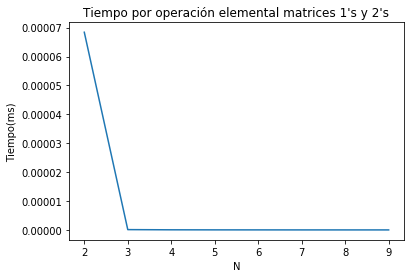

In [5]:
test1(10,10)

Comparación local (C++, Java, Python)

In [8]:
Cpp=[
1.75e-08,
5.11111e-09,
2.5e-09,
1.51111e-09,
1.31313e-09,
1.146e-09,
1.03125e-09,
9.87654e-10,
9.36842e-10,
9.24833e-10,
8.87681e-10,
8.54438e-10,
8.56009e-10,
8.35249e-10,
8.40474e-10,
8.24159e-10,
9.40917e-10,
9.20117e-10,
9.08333e-10,
8.88225e-10,
6.12147e-10,
3.36484e-10,
3.33924e-10,
3.3502e-10,
3.34436e-10,
3.33359e-10,
3.3256e-10,
3.3252e-10,
3.31073e-10,
3.49875e-10,
4.27517e-10,
3.5516e-10,
3.55833e-10,
3.45697e-10,
3.44288e-10,
3.45418e-10,
3.44783e-10,
3.4282e-10,
3.42089e-10,
3.4114e-10,
3.41229e-10,
3.40152e-10,
3.399e-10,
3.39576e-10,
3.38966e-10,
3.43706e-10,
3.37811e-10,
3.38046e-10,
3.37374e-10,
3.37646e-10,
3.36898e-10,
3.41759e-10,
3.41013e-10,
3.41102e-10,
3.45393e-10,
3.40745e-10,
3.39658e-10,
3.394e-10,
3.38982e-10,
3.3773e-10,
3.38105e-10,
3.36306e-10,
3.338e-10,
3.32902e-10,
3.33488e-10,
3.32492e-10,
3.32789e-10,
3.32476e-10,
3.32726e-10,
3.32001e-10,
3.33463e-10,
3.33167e-10,
3.3139e-10,
3.3155e-10,
3.31114e-10,
3.44788e-10,
3.31849e-10,
3.32025e-10,
3.31732e-10,
3.31301e-10,
3.31657e-10,
3.31728e-10,
3.31208e-10,
3.30722e-10,
3.3073e-10,
3.29852e-10,
3.29509e-10,
3.30239e-10,
3.29416e-10,
3.31732e-10,
3.36262e-10,
3.31249e-10,
3.3066e-10,
3.30681e-10,
3.30923e-10,
3.30105e-10,
3.30258e-10,
3.29941e-10,
3.30397e-10,
]


In [ ]:
Java =[
1.8235000000000002E-6,
6.667777777777778E-7,
4.831696428571429E-7,
3.8447555555555555E-7,
3.038207070707071E-7,
3.0200470957613817E-7,
3.2447499999999997E-7,
4.204110384894699E-7,
4.104815789473684E-7,
2.7030853994490356E-7,
2.119867149758454E-7,
5.167100591715976E-8,
8.425037792894937E-8,
8.464091954022988E-8,
8.422769657258065E-8,
8.28713431896823E-8,
8.511507936507937E-8,
8.318222654787752E-8,
8.342775641025641E-8,
8.35258558708036E-8,
8.384960599654045E-8,
8.574152488972905E-8,
7.84936835106383E-8,
4.227317551020408E-8,
4.3625130525583014E-8,
3.584921189533349E-8,
3.188244434137291E-8,
2.916961845755888E-8,
7.298009416195857E-8,
2.2424421282475563E-8,
7.629588293650794E-9,
7.487024087024088E-9,
8.36395444920725E-9,
1.1812162082224194E-8,
8.24406624934794E-9,
7.526611765412209E-9,
8.225650969529086E-9,
7.556417941033326E-9,
8.465348101265823E-9,
7.470163997032924E-9,
7.963944212223043E-9,
9.631221964177774E-9,
1.638792509736867E-8,
1.3042463587182688E-8,
9.314080059826752E-9,
7.530858608721896E-9,
7.708575475146199E-9,
7.48399936452595E-9,
7.545579797979799E-9,
7.392244414752894E-9,
7.87365355891308E-9,
8.017159131363474E-9,
7.506929220671E-9,
7.747959663355827E-9,
8.420944222283508E-9,
1.290128480648913E-8,
1.3010972961794966E-8,
8.04201071997682E-9,
8.038846872082166E-9,
7.633565135116526E-9,
7.734152263478931E-9,
7.366726127488032E-9,
7.416940283587599E-9,
7.80119444062199E-9,
7.450584961341382E-9,
7.365444687682673E-9,
7.442807253620403E-9,
7.996092031208557E-9,
7.435755395683453E-9,
8.109915712434631E-9,
7.846920055253389E-9,
8.173283465229292E-9,
7.974835149545575E-9,
8.003377777777778E-9,
7.741202463722919E-9,
8.446125557661082E-9,
9.847041420118343E-9,
9.59194845673311E-9,
8.008483687106918E-9,
8.968451824776749E-9,
9.026496060262113E-9,
9.282422131021348E-9,
9.343799645606745E-9,
1.068774185622735E-8,
9.66567593040651E-9,
8.96228226329331E-9,
8.307891824085006E-9,
7.971803480271637E-9,
7.876814263052623E-9,
8.166864705933371E-9,
7.958067985786151E-9,
7.904920112620425E-9,
8.217445404434459E-9,
9.47375807940905E-9,
9.28033876890634E-9,
8.987873477989601E-9,
8.120976836574503E-9,
9.280173420613353E-9,
8.360581407035176E-9,
]

In [9]:
PythonNp=[
1.11666666953e-06 ,
2.80000000304e-07 ,
1.93750000221e-07 ,
7.82222222268e-08 ,
6.81818180671e-08 ,
2.00941914363e-08 ,
1.42708333565e-08 ,
1.2999273759e-08 ,
7.42105264276e-09 ,
5.62770562692e-09 ,
5.94806764186e-09 ,
3.66863905206e-09 ,
3.26908541873e-09 ,
2.81992336801e-09 ,
2.48235887473e-09 ,
2.22292125083e-09 ,
1.57848324217e-09 ,
1.45242195248e-09 ,
1.39102564261e-09 ,
1.28311487124e-09 ,
9.22544685614e-10 ,
9.78785969251e-10 ,
7.31382976877e-10 ,
6.23673471154e-10 ,
5.56909153448e-10 ,
7.99751532956e-10 ,
5.86734693714e-10 ,
3.9843961932e-10 ,
3.44632767706e-10 ,
2.76351478217e-10 ,
2.58866567335e-10 ,
2.40163876564e-10 ,
2.40148738144e-10 ,
2.08222419684e-10 ,
2.61910972208e-10 ,
4.2326665795e-10 ,
5.92797783697e-10 ,
4.9352357056e-10 ,
3.74208860804e-10 ,
3.29756685187e-10 ,
3.96825396988e-10 ,
3.88127127429e-10 ,
4.04911180696e-10 ,
4.01720072127e-10 ,
3.18868277302e-10 ,
3.38303226756e-10 ,
2.63157894696e-10 ,
2.59342112441e-10 ,
2.73131313177e-10 ,
2.52378179093e-10 ,
1.86706497323e-10 ,
2.22414348647e-10 ,
1.80441777971e-10 ,
1.67412237531e-10 ,
2.05690384265e-10 ,
1.62337220189e-10 ,
1.38551413951e-10 ,
1.33570027221e-10 ,
1.23716153134e-10 ,
1.22156800565e-10 ,
9.11567387688e-11 ,
1.38876291205e-10 ,
1.30528727896e-10 ,
1.37424888816e-10 ,
8.62195866278e-11 ,
8.77667547169e-11 ,
1.10694604633e-10 ,
8.55491010726e-11 ,
9.30847158994e-11 ,
1.04110830161e-10 ,
1.0157666405e-10 ,
9.91322691506e-11 ,
8.09966061146e-11 ,
9.31841909248e-11 ,
9.91772303071e-11 ,
7.71658525225e-11 ,
6.62764310542e-11 ,
8.85861627161e-11 ,
8.54952829818e-11 ,
8.04679638008e-11 ,
8.14772101364e-11 ,
5.69199030377e-11 ,
6.47514495211e-11 ,
5.60185090285e-11 ,
6.5311105415e-11 ,
6.24695956929e-11 ,
5.99173553884e-11 ,
6.24100848794e-11 ,
5.64866542584e-11 ,
5.94451386845e-11 ,
5.77179336363e-11 ,
5.42477962168e-11 ,
5.55578419114e-11 ,
4.97735566864e-11 ,
6.1354712042e-11 ,
5.37463579429e-11 ,
4.90180373539e-11 ,
5.62462029804e-11 ,
]

In [16]:
PythonNoNp=[
5.75000000443e-07 ,
3.06666666398e-07 ,
2.58035714345e-07 ,
2.0533333332e-07 ,
1.96212121205e-07 ,
2.32653061226e-07 ,
1.74583333343e-07 ,
1.66158315171e-07 ,
1.66105263157e-07 ,
1.58638331363e-07 ,
1.61020531403e-07 ,
1.61680473374e-07 ,
1.58484504913e-07 ,
1.63724137929e-07 ,
1.58177923387e-07 ,
1.57229736813e-07 ,
1.58209876544e-07 ,
1.56315040803e-07 ,
1.58320512819e-07 ,
1.55439411538e-07 ,
1.54612723429e-07 ,
1.65103969754e-07 ,
1.58614066194e-07 ,
1.60940408164e-07 ,
1.5837974243e-07 ,
1.55581437482e-07 ,
1.58031076067e-07 ,
1.58030331477e-07 ,
1.52013182674e-07 ,
1.51457668753e-07 ,
1.56646825397e-07 ,
1.54034046761e-07 ,
1.52755254867e-07 ,
1.52991422656e-07 ,
1.51596461485e-07 ,
1.50806007785e-07 ,
1.51719298246e-07 ,
1.49727195881e-07 ,
1.52449367088e-07 ,
1.52032520325e-07 ,
1.51111930716e-07 ,
1.501014857e-07 ,
1.50371663342e-07 ,
1.46474684422e-07 ,
1.50407154282e-07 ,
1.5164210926e-07 ,
1.49940606725e-07 ,
1.49472942975e-07 ,
1.49487676768e-07 ,
1.49408262626e-07 ,
1.49029126214e-07 ,
1.48719252742e-07 ,
1.46531864159e-07 ,
1.47359769505e-07 ,
1.50609314672e-07 ,
1.49224131591e-07 ,
1.48540040325e-07 ,
1.58103943999e-07 ,
1.57607142857e-07 ,
1.4936289676e-07 ,
1.48554605213e-07 ,
1.48144923154e-07 ,
1.48499784695e-07 ,
1.48911701298e-07 ,
1.48137341493e-07 ,
1.50057534123e-07 ,
1.49485133923e-07 ,
1.49280881616e-07 ,
1.49509176332e-07 ,
1.49426757328e-07 ,
1.46198226927e-07 ,
1.47386648203e-07 ,
1.49684212619e-07 ,
1.49875615213e-07 ,
1.53890269854e-07 ,
1.55396373425e-07 ,
1.53584971687e-07 ,
1.50443798305e-07 ,
1.60597189465e-07 ,
1.64352881368e-07 ,
1.52171874031e-07 ,
1.50701381649e-07 ,
1.5781735848e-07 ,
1.50515427612e-07 ,
1.50851179237e-07 ,
1.50840017504e-07 ,
1.50319510035e-07 ,
1.7538232418e-07 ,
1.51898199876e-07 ,
1.49839911773e-07 ,
1.49885467993e-07 ,
1.4878301819e-07 ,
1.47991505339e-07 ,
1.4823585279e-07 ,
1.50798122546e-07 ,
1.50572789695e-07 ,
1.49533367507e-07 ,
1.55115788972e-07 ,
]

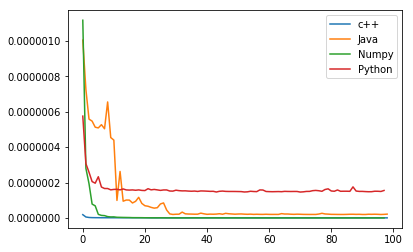

In [18]:
plt.plot(Cpp,label='c++')
plt.plot(Java,label='Java')
plt.plot(PythonNp,label='Numpy')
plt.plot(PythonNoNp,label='Python')
plt.legend(loc='upper right');